## Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

See full course materials on GitHub: https://github.com/mrdbourke/tensorflow-deep-learning/





## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.


In [29]:


# import zipfile 

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file 
# zip_ref = zipfile.ZipFile("C:/Users/majd4/Desktop/Tensorflow/TensorflowNotebooks/pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()


## Inspect the data (become one with it)


A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [30]:
import os 

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [31]:
# Another way to find out how many images are in a file 
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.



In [32]:
# Get the classnames programmatically
import pathlib
import numpy as np 
data_dir = pathlib.Path("pizza_steak")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['test' 'train']


In [33]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path 
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {img.shape}") # show the shape of the image 
    
    return img
    

['1212161.jpg']
Image shape: (509, 512, 3)


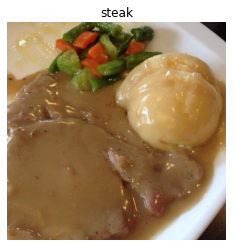

In [67]:
# View a random image form the training dataset 
img = view_random_image("pizza_steak/train/",target_class="steak")

In [68]:
def image_reshape(image):
    w = image.shape[0]
    h = image.shape[1]
    r = image.shape[2]
    z = w * h * r
    return z

    
    

In [69]:
list = np.reshape(img, image_reshape(img))
len(list)

781824

array([185, 159, 126, ...,  41,  23,  19], dtype=uint8)

In [39]:
224, 224, 3

(224, 224, 3)

In [36]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  9,   9,   7],
        [  9,   9,   7],
        [  9,   9,   7],
        ...,
        [ 17,  21,  22],
        [ 16,  21,  24],
        [ 17,  22,  25]],

       [[  9,   9,   7],
        [  9,   9,   7],
        [  9,   9,   7],
        ...,
        [ 18,  22,  23],
        [ 17,  22,  25],
        [ 18,  23,  26]],

       [[ 10,  10,   8],
        [ 10,  10,   8],
        [ 10,  10,   8],
        ...,
        [ 19,  23,  24],
        [ 17,  22,  25],
        [ 17,  22,  25]],

       ...,

       [[167, 121, 123],
        [163, 114, 117],
        [159, 110, 114],
        ...,
        [232, 225, 215],
        [233, 226, 216],
        [234, 227, 217]],

       [[163, 114, 118],
        [160, 109, 114],
        [159, 108, 113],
        ...,
        [233, 226, 216],
        [234, 227, 217],
        [234, 227, 217]],

       [[164, 113, 118],
        [161, 110, 115],
        [160, 109, 116],
        ...,
        [234, 227, 21

In [37]:
# View the image shape 
img.shape # returns width, height, colour channels

(512, 512, 3)

In [3]:
import tensorflow as tf
image  = tf.io.read_file("C:/Users/majd4/Desktop/Tensorflow Kurs/TensorflowNotebooks/Steak.jpg")



In [38]:
import tensorflow as tf
image  = tf.io.read_file("C:/Users/majd4/Desktop/Tensorflow Kurs/TensorflowNotebooks/Steak.jpg")
image = tf.image.decode_image(image)
image

<tf.Tensor: shape=(853, 1280, 3), dtype=uint8, numpy=
array([[[ 61,  54,  48],
        [ 59,  52,  46],
        [ 60,  53,  47],
        ...,
        [157,  84,  49],
        [156,  83,  48],
        [154,  81,  46]],

       [[ 57,  50,  44],
        [ 55,  48,  42],
        [ 56,  49,  43],
        ...,
        [167,  94,  59],
        [166,  93,  58],
        [165,  92,  57]],

       [[ 53,  46,  40],
        [ 50,  43,  37],
        [ 51,  44,  38],
        ...,
        [173, 104,  65],
        [173, 101,  63],
        [172, 100,  62]],

       ...,

       [[192, 150, 134],
        [155, 125, 125],
        [192, 182, 217],
        ...,
        [176, 157, 142],
        [117, 105,  83],
        [198, 191, 163]],

       [[183, 140, 134],
        [168, 137, 142],
        [197, 188, 217],
        ...,
        [204, 185, 168],
        [129, 117,  93],
        [182, 175, 146]],

       [[177, 132, 137],
        [178, 146, 157],
        [203, 195, 218],
        ...,
        [212, 194, 1